1.     
Read the data and clean it (remove stopwords and
non-alphanumeric characters) using regular expressions

Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import re, string
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

The objective of this exercise is to predict whether a tweet
is real or fake.

Importing Dataset

In [2]:
df_fake = pd.read_csv('fake_tweets.csv')

In [3]:
df_fake.head()

,Unnamed: 0,text,target
0,0,'I can't have kids cuz I got in a bicycle acci...,real
1,1,@1acd4900c1424d1 @FoxNews no one is rioting bu...,fake
2,2,@luke_winkie Whoever is directing these videos...,real
3,3,The Opposite of Love is Fear HereÂÃÂªs Why\n...,fake
4,4,China's Stock Market Crash: Are There Gems In ...,fake


In [4]:
df_fake.info

<bound method DataFrame.info of       Unnamed: 0                                               text target
0              0  'I can't have kids cuz I got in a bicycle acci...   real
1              1  @1acd4900c1424d1 @FoxNews no one is rioting bu...   fake
2              2  @luke_winkie Whoever is directing these videos...   real
3              3  The Opposite of Love is Fear HereÂÃÂªs Why\n...   fake
4              4  China's Stock Market Crash: Are There Gems In ...   fake
...          ...                                                ...    ...
7608        7608  #LonePine remembered around Australia as 'desc...   real
7609        7609  Mmmmmm I'm burning.... I'm burning buildings I...   fake
7610        7610  @Hollyorange8 my day has been a disaster of em...   real
7611        7611  #cum explosion!\n\n@begforcum \n@allday_cumsho...   real
7612        7612       @VillicanaAlicia [[Is it Darude Sandstorm?]]   real

[7613 rows x 3 columns]>

In [5]:
#  here we are dropping unnamed column
df_fake.drop('Unnamed: 0', axis =1, inplace=True)

In [9]:
df_fake.head()

,text,target
0,'i can't have kids cuz i got in a bicycle acci...,real
1,@1acd4900c1424d1 @foxnews no one is rioting bu...,fake
2,@luke_winkie whoever is directing these videos...,real
3,the opposite of love is fear hereâãâªs why\n...,fake
4,china's stock market crash: are there gems in ...,fake


In [6]:
df_fake.isnull().sum()


text      0
target    0
dtype: int64

It shows that there are no null values in the data set

In [7]:
df_fake.shape

(7613, 2)

There are total 7613 rows and 2 columns 

In [19]:
#  we are replacing real as 1 and fake as 0 basically we are encoding them 
df_fake['target'].replace({"real":1,"fake":0},inplace=True)

In [20]:
df_fake

,text,target
0,'i can't kids cuz got bicycle accident &amp; s...,1
1,@1acd4900c1424d1 @foxnews one rioting burning ...,0
2,@luke_winkie whoever directing videos needs gr...,1
3,opposite love fear hereâãâªs why\nhttp://t.c...,0
4,china's stock market crash: gems rubble? http:...,0
...,...,...
7608,#lonepine remembered around australia 'descend...,1
7609,mmmmmm i'm burning.... i'm burning buildings i...,0
7610,@hollyorange8 day disaster emotions,1
7611,#cum explosion!\n\n@begforcum \n@allday_cumsho...,1


<AxesSubplot:>

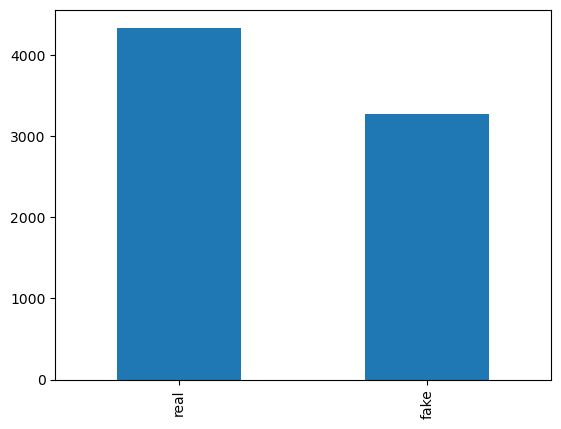

In [18]:
#Checking count:

df_fake['target'].value_counts().plot(kind='bar')

This plot shows that real ones are more than fake ones in target column

In [14]:
df_fake['text'] = df_fake['text'].apply(lambda x: str(x).lower())


Here we have done all alphabets in lower case as it is case sensitive so it will consider two words as different 

In [ ]:
Removing Stopwords
# to focus on more important words we remove stopwords

In [15]:
stop_words = stopwords.words('english')

def remove_stopwords(txt):
    txt = ' '.join(word for word in txt.split(' ') if word not in stop_words)
    return txt

df_fake['text'] = df_fake['text'].apply(remove_stopwords)


Removing non-Alphanumeric characters

In [21]:
def clean_text(text):
    text = str(text).lower() 
    text = re.sub('\[.*?\]', '', text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) 
    text = re.sub('\n', '', text) 
    text = re.sub('\w*\d\w*', '', text) 
    return text

In [23]:
df_fake['text'] = df_fake['text'].apply(clean_text)

In [24]:
df_fake

,text,target
0,i cant kids cuz got bicycle accident amp split...,1
1,foxnews one rioting burning buildings looting,0
2,lukewinkie whoever directing videos needs grab...,1
3,opposite love fear hereâãâªs why,0
4,chinas stock market crash gems rubble forbesasia,0
...,...,...
7608,lonepine remembered around australia descendan...,1
7609,mmmmmm im burning im burning buildings im buil...,0
7610,day disaster emotions,1
7611,cum explosionbegforcum alldaycumshots cumcover...,1


2.     
Visualize word frequency using word cloud for
fake and real.

In [ ]:
to remove some non-ascii characters like hereâãâªs. Thus removing them before moving forward

In [33]:
def remove_non_ascii(text):
    return re.sub(r'[^\x00-\x7F]', '', text)

In [35]:
df_fake['text'] = df_fake['text'].apply(remove_non_ascii)

In [42]:
from wordcloud import WordCloud
wc= WordCloud(width=500,height=500, min_font_size = 10, background_color='black')

In [43]:
real_wordcloud = wc.generate(df_fake[df_fake['target']==1]['text'].str.cat(sep=" "))

In [44]:
spam_wordcloud

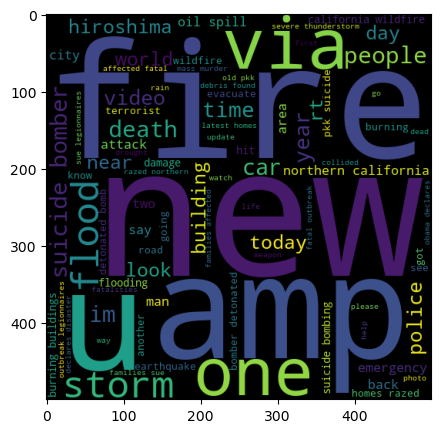

In [45]:
plt.figure(figsize=(14,5))
plt.imshow(spam_wordcloud)

In [47]:
fake_wordcloud = wc.generate(df_fake[df_fake['target']==0]['text'].str.cat(sep=" "))

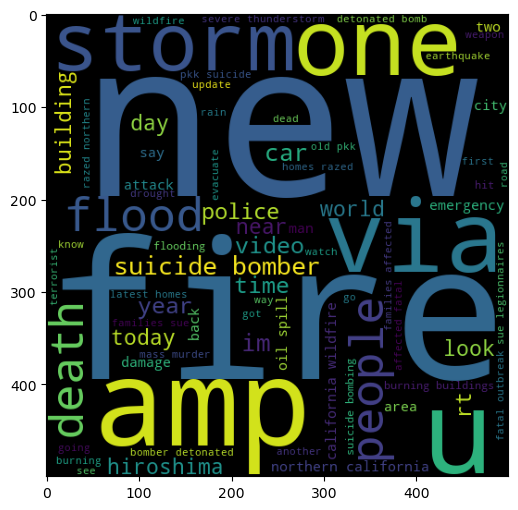

In [48]:
plt.figure(figsize=(12,6))
plt.imshow(fake_tweets_wordcloud)

3.     
Apply count vectorizer or Tf-Idf and build a basic model (no ensemple based models). Tune the model to get the best performance.


In [49]:
import string
exclude = string.punctuation
print(exclude)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [50]:
def remove_punctuation(text):
    return text.translate (str.maketrans(" ",' ', exclude))

In [52]:
df_fake['text'] = df_fake['text'].apply(remove_punctuation)

In [53]:
df_fake['text']

0       i cant kids cuz got bicycle accident amp split...
1           foxnews one rioting burning buildings looting
2       lukewinkie whoever directing videos needs grab...
3                            opposite love fear heres why
4       chinas stock market crash gems rubble  forbesasia
                              ...                        
7608    lonepine remembered around australia descendan...
7609    mmmmmm im burning im burning buildings im buil...
7610                                day disaster emotions
7611    cum explosionbegforcum alldaycumshots cumcover...
7612                                     villicanaalicia 
Name: text, Length: 7613, dtype: object

Splitting the data into train and test

In [55]:
y = df_fake['target']
X = df_fake['text']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

count vectorizer

In [56]:
cvect = CountVectorizer()
X_traint = cvect.fit_transform(X_train)
X_testt = cvect.transform(X_test)

In [57]:
X_traint = X_traint.astype(np.float32)
X_testt = X_testt.astype(np.float32)

In [58]:
X_traint.shape

(5329, 13122)

# Base Model

# NaiveBayes - CountVectorizer

In [77]:
mnb = MultinomialNB()
mnb.fit(X_traint, y_train)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Train Set
y_train_pred = mnb.predict(X_traint)

print('Accuracy score - Train: ', accuracy_score(y_train, y_train_pred))
print('Precision:', precision_score(y_train, y_train_pred))
print('Recall:', recall_score(y_train, y_train_pred))
print('F1-score:', f1_score(y_train, y_train_pred))

# Calculate AUROC for the training set
y_train_prob = mnb.predict_proba(X_traint)[:, 1]  
auroc_train = roc_auc_score(y_train, y_train_prob)
print('AUROC - Train:', auroc_train)

# Test Set
y_test_pred = mnb.predict(X_testt)

print('Accuracy score - Test: ', accuracy_score(y_test, y_test_pred))
print('Precision:', precision_score(y_test, y_test_pred))
print('Recall:', recall_score(y_test, y_test_pred))
print('F1-score:', f1_score(y_test, y_test_pred))

# Calculate AUROC for the test set
y_test_prob = mnb.predict_proba(X_testt)[:, 1]  
auroc_test = roc_auc_score(y_test, y_test_prob)
print('AUROC - Test:', auroc_test)

Accuracy score - Train:  0.922124225933571
Precision: 0.914079648792725
Recall: 0.9538612565445026
F1-score: 0.9335468374699759
AUROC - Train: 0.9699552480403922
Accuracy score - Test:  0.792907180385289
Precision: 0.7935018050541516
Recall: 0.854587869362364
F1-score: 0.8229127667540246
AUROC - Test: 0.8502237757007015


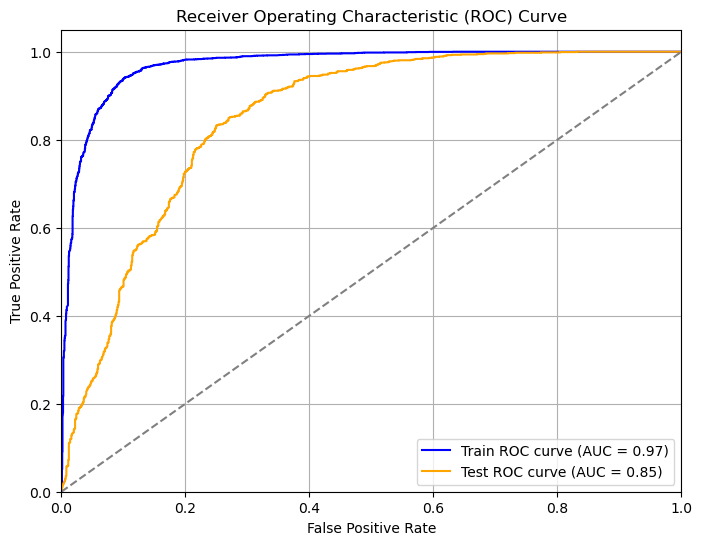

In [78]:
# Calculate the ROC curve for both train and test sets
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

# Calculate the area under the ROC curve (AUC) for both train and test sets
auc_train = roc_auc_score(y_train, y_train_prob)
auc_test = roc_auc_score(y_test, y_test_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', label=f'Train ROC curve (AUC = {auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='orange', label=f'Test ROC curve (AUC = {auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [79]:
from sklearn.metrics import auc

Alpha: 0.01
Accuracy score - Test:  0.7727670753064798
Precision: 0.7817781043350478
Recall: 0.8273716951788491
F1-score: 0.8039289761994711
AUROC - Test: 0.8224130999167855

Alpha: 0.02
Accuracy score - Test:  0.7762697022767076
Precision: 0.7855563743551953
Recall: 0.8289269051321928
F1-score: 0.8066590995081345
AUROC - Test: 0.8267475853729231

Alpha: 0.03
Accuracy score - Test:  0.7788966725043783
Precision: 0.7881918819188192
Recall: 0.8304821150855366
F1-score: 0.8087845513063233
AUROC - Test: 0.8294446591472213

Alpha: 0.05
Accuracy score - Test:  0.7819614711033275
Precision: 0.78928046989721
Recall: 0.8359253499222395
F1-score: 0.8119335347432025
AUROC - Test: 0.8330038771165971

Alpha: 0.1
Accuracy score - Test:  0.7841506129597198
Precision: 0.7909024211298606
Recall: 0.838258164852255
F1-score: 0.8138920347300868
AUROC - Test: 0.8379219558868904

Alpha: 0.2
Accuracy score - Test:  0.7937828371278459
Precision: 0.7976625273922571
Recall: 0.8491446345256609
F1-score: 0.822598

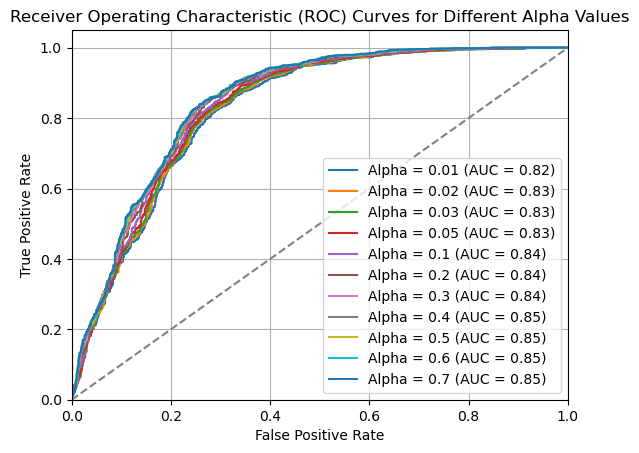

In [80]:
alphas = [.01, .02, .03, .05, .1, .2, .3, .4, .5, .6, .7]

for alpha in alphas:
    mnb = MultinomialNB(alpha=alpha)
    mnb.fit(X_traint, y_train)
    y_test_pred = mnb.predict(X_testt)
    
    print('Alpha:', alpha)
    print('Accuracy score - Test: ', accuracy_score(y_test, y_test_pred))
    print('Precision:', precision_score(y_test, y_test_pred))
    print('Recall:', recall_score(y_test, y_test_pred))
    print('F1-score:', f1_score(y_test, y_test_pred))
    
    # Calculate AUROC for the test set
    y_test_prob = mnb.predict_proba(X_testt)[:, 1]  # Probability of the positive class (class 1)
    auroc_test = roc_auc_score(y_test, y_test_prob)
    print('AUROC - Test:', auroc_test)
    print()
    fpr, tpr, _ = roc_curve(y_test, y_test_prob)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Alpha = {alpha} (AUC = {auc_score:.2f})')
    
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Different Alpha Values')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Decision Tree

In [84]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
dt = DecisionTreeClassifier()

# Train the Decision Tree model
dt.fit(X_traint, y_train)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Train Set
y_train_pred = dt.predict(X_traint)

print('Accuracy score - Train: ', accuracy_score(y_train, y_train_pred))
print('Precision:', precision_score(y_train, y_train_pred))
print('Recall:', recall_score(y_train, y_train_pred))
print('F1-score:', f1_score(y_train, y_train_pred))

# Calculate AUROC for the training set
y_train_prob = dt.predict_proba(X_traint)[:, 1]  
auroc_train = roc_auc_score(y_train, y_train_prob)
print('AUROC - Train:', auroc_train)

print('-----------------------------------------------------------------------------------------------------------------')

# Test Set
y_test_pred = dt.predict(X_testt)

print('Accuracy score - Test: ', accuracy_score(y_test, y_test_pred))
print('Precision:', precision_score(y_test, y_test_pred))
print('Recall:', recall_score(y_test, y_test_pred))
print('F1-score:', f1_score(y_test, y_test_pred))

# Calculate AUROC for the test set
y_test_prob = dt.predict_proba(X_testt)[:, 1]  
auroc_test = roc_auc_score(y_test, y_test_prob)
print('AUROC - Test:', auroc_test)

Accuracy score - Train:  0.9878025896040533
Precision: 0.991779020059191
Recall: 0.9869109947643979
F1-score: 0.9893390191897655
AUROC - Train: 0.9996466458056447
-----------------------------------------------------------------------------------------------------------------
Accuracy score - Test:  0.7451838879159369
Precision: 0.7584434654919237
Recall: 0.8032659409020217
F1-score: 0.7802114803625378
AUROC - Test: 0.740547580386278


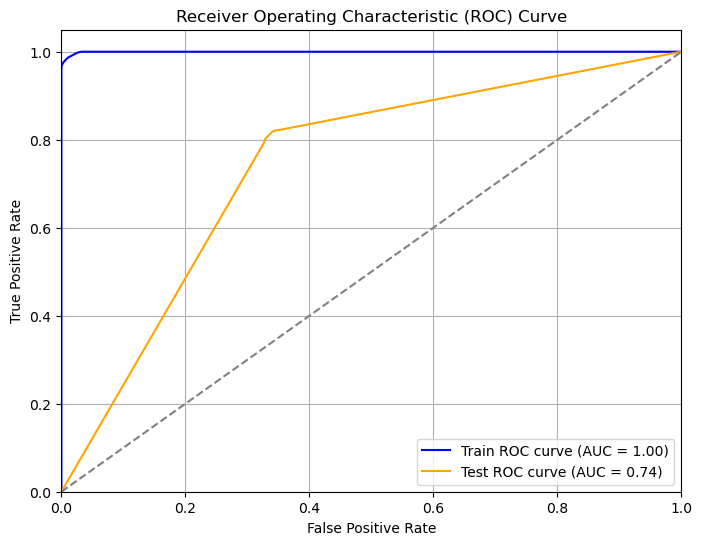

In [85]:
# Calculate the ROC curve for both train and test sets
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

# Calculate the area under the ROC curve (AUC) for both train and test sets
auc_train = roc_auc_score(y_train, y_train_prob)
auc_test = roc_auc_score(y_test, y_test_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', label=f'Train ROC curve (AUC = {auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='orange', label=f'Test ROC curve (AUC = {auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)

# Tunning the Model 

In [82]:
from sklearn.model_selection import RandomizedSearchCV

# Creating a Decision Tree classifier
dt = DecisionTreeClassifier()

# Defining the hyperparameter search space
param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=10, scoring='roc_auc', cv=5, n_jobs=-1, random_state=42)

# Train the RandomizedSearchCV on your data
random_search.fit(X_traint, y_train)

# Get the best hyperparameters found by RandomizedSearchCV
best_params = random_search.best_params_

# Create a Decision Tree classifier with the best hyperparameters
dt_best = DecisionTreeClassifier(**best_params)

# Train the Decision Tree model with the best hyperparameters
dt_best.fit(X_traint, y_train)

# Make predictions on the train set
y_train_pred = dt_best.predict(X_traint)

print('Accuracy score - Train: ', accuracy_score(y_train, y_train_pred))
print('Precision:', precision_score(y_train, y_train_pred))
print('Recall:', recall_score(y_train, y_train_pred))
print('F1-score:', f1_score(y_train, y_train_pred))

# Calculate AUROC for the training set
y_train_prob = dt_best.predict_proba(X_traint)[:, 1]  
auroc_train = roc_auc_score(y_train, y_train_prob)
print('AUROC - Train:', auroc_train)

print('-----------------------------------------------------------------------------------------------------------------')

# Make predictions on the test set
y_test_pred = dt_best.predict(X_testt)

print('Accuracy score - Test: ', accuracy_score(y_test, y_test_pred))
print('Precision:', precision_score(y_test, y_test_pred))
print('Recall:', recall_score(y_test, y_test_pred))
print('F1-score:', f1_score(y_test, y_test_pred))

# Calculate AUROC for the test set
y_test_prob = dt_best.predict_proba(X_testt)[:, 1]  
auroc_test = roc_auc_score(y_test, y_test_prob)
print('AUROC - Test:', auroc_test)

Accuracy score - Train:  0.821917808219178
Precision: 0.843495272253016
Recall: 0.8465314136125655
F1-score: 0.8450106157112527
AUROC - Train: 0.9128098345476031
-----------------------------------------------------------------------------------------------------------------
Accuracy score - Test:  0.7626970227670753
Precision: 0.7805429864253394
Recall: 0.8048211508553654
F1-score: 0.7924961715160795
AUROC - Test: 0.814099037889153


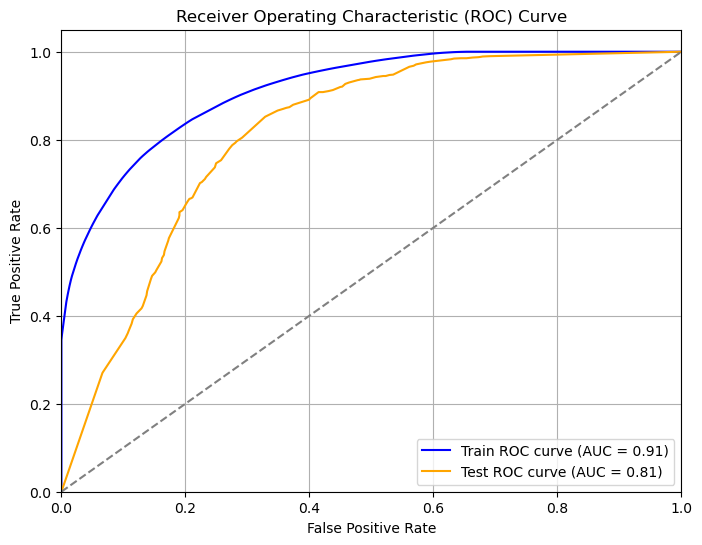

In [83]:
# Calculate the ROC curve for both train and test sets
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

# Calculate the area under the ROC curve (AUC) for both train and test sets
auc_train = roc_auc_score(y_train, y_train_prob)
auc_test = roc_auc_score(y_test, y_test_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', label=f'Train ROC curve (AUC = {auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='orange', label=f'Test ROC curve (AUC = {auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Model Performance

In [ ]:
I have used decision tree and naive bayes countvectorizer and Decision Tree is giving me best accuracy.


In [86]:
pd.DataFrame({'Models':['NaiveBayes','Decision-Tree',"DT_Tuned"],
              'Accuracy':[0.92,0.98,0.82],
            'AUC-SCORE-Train':[0.96,0.99,0.91],'AUC-SCORE-Test':[0.85,0.74,0.81],
              })

,Models,Accuracy,AUC-SCORE-Train,AUC-SCORE-Test
0,NaiveBayes,0.92,0.96,0.85
1,Decision-Tree,0.98,0.99,0.74
2,DT_Tuned,0.82,0.91,0.81


After tunning te model DT my AUROC - Train: 0.9127769392803755 after tuning AUROC - Test: 0.8185328666664589